In [1]:
import nano as ecs
import numpy as np
from lmfit import Model
%pylab inline
#chose lmfit over scipy due to ability to vary what parameters to solve for. 

Populating the interactive namespace from numpy and matplotlib


In [2]:
k0=1 # Rate Constant | cm/s
D=10E-6 # Diffusion Coefficient | cm2/s
E=0.1 # applied potential | V
E0=0.4 # formal potential | V
alpha=0.5  # Charge transfer coefficient
F=96485  # Faraday Constant | C/mol
R=8.314 #Gas Constant | J/mol*K
T=293 #Temperature | K
f=F/(R*T)
n=1  # number of electrons per reaction 
rtip=25e-7 # Tip radius | cm
L=np.linspace(0.2,10,49) # Dimensionless Distance 

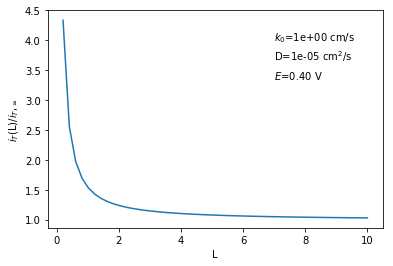

In [3]:
y=ecs.approach(L,E,E0, D=1*D, k0=1*k0)
ecs.approach_plot(L,y)

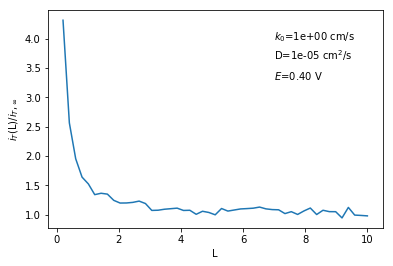

In [4]:
y_noise = 0.05 * np.random.normal(size=L.size)
yn = y + y_noise
ecs.approach_plot(L,yn)

In [5]:
fmodel=Model(ecs.approach)
# initial values
#fmodel.set_param_hint('D', value=1e-6, min=1e-7, max=1e-3)
fmodel.set_param_hint('n', value=1, min=0, max=4)
fmodel.set_param_hint('k0', value=1, min=0, max=1e2)
params = fmodel.make_params(E=E, E0=E0, D=D, rtip=rtip, alpha=alpha, T=T)
# fix parameters:
params['T'].vary = False
params['alpha'].vary = False
params['rtip'].vary = False
params['E0'].vary = False
params['E'].vary = False
params['D'].vary = False
#fit
result = fmodel.fit(yn, params, L=L)

In [6]:
print(result.fit_report())

[[Model]]
    Model(approach)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 49
    # variables        = 3
    chi-square         = 0.09628921
    reduced chi-square = 0.00209324
    Akaike info crit   = -299.378746
    Bayesian info crit = -293.703285
[[Variables]]
    E:      0.1 (fixed)
    E0:     0.4 (fixed)
    D:      1e-05 (fixed)
    k0:     0.93750938 (init = 1)
    pn:     0.00000000 (init = 0)
    T:      293 (fixed)
    alpha:  0.5 (fixed)
    n:      1.00000000 (init = 1)
    rtip:   2.5e-06 (fixed)



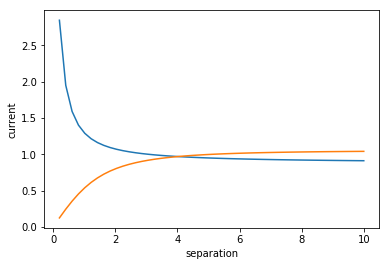

In [7]:
yh1=ecs.approach(L,E,E0, D=1*D, k0=0.1*k0,pn=0)
yh2=ecs.approach(L,E,E0, D=1*D, k0=0.001*k0,pn=1)
plot(L,yh1)
plot(L,yh2)
xlabel('separation')
ylabel('current')
show
savefig('hopg')

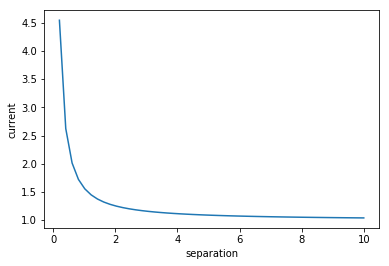

In [8]:
yp=ecs.approach(L,E,E0, D=1*D, k0=5*k0,pn=0)
plot(L,yp)
xlabel('separation')
ylabel('current')
show
savefig('pt')

<function matplotlib.pyplot.show(*args, **kw)>

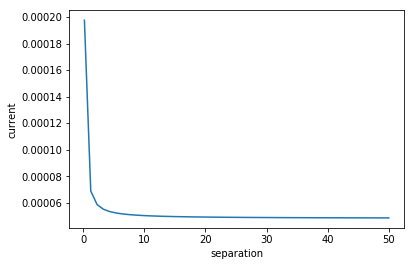

In [15]:
L=np.linspace(0.2,50,49) # Dimensionless Distance 
yp=ecs.approach(L,E=0.35,E0=0.1, D=1*D, k0=1*k0,pn=0)
plot(L,yp)
xlabel('separation')
ylabel('current')
show